In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [ ]:
#Download the dataset
! gdown 1ehJWggOd4gCT2lG-o0bmmGPEGYuwvDN0

Downloading...
From: https://drive.google.com/uc?id=1ehJWggOd4gCT2lG-o0bmmGPEGYuwvDN0
To: /content/Yulu.csv
100% 648k/648k [00:00<00:00, 5.34MB/s]


In [ ]:
#Read and view the data
df=pd.read_csv('Yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Number of rows and columns
df.shape

(10886, 12)

There are total 10886 rows and 12 columns in the dataset

In [ ]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Datetime is in object format, we will have to convert it datetime format for further analysis like extraction of year, month, date etc.

In [ ]:
#Basic statistical measurement
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
print('Mean of count of rental bikes=',df['count'].mean())
print('Median of count of rental bikes=',df['count'].median())
print('Mode of count of rental bikes=',df['count'].mode())

Mean of count of rental bikes= 191.57413191254824
Median of count of rental bikes= 145.0
Mode of count of rental bikes= 0    5
Name: count, dtype: int64


In [ ]:
#Check duplicate entries
df[df.duplicated]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


<Axes: >

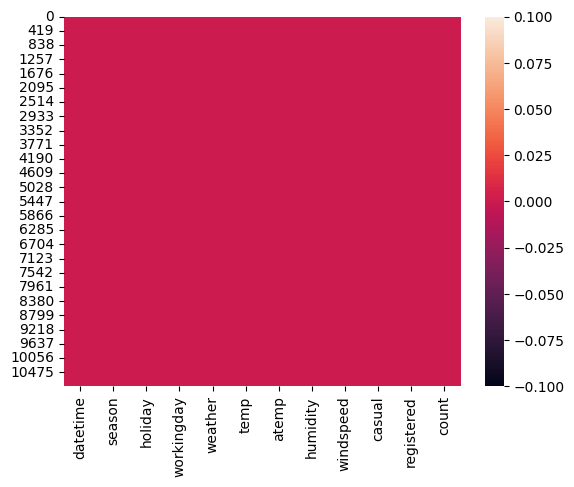

In [ ]:
#Check null values usinf heatmap
sns.heatmap(df.isnull())

There are no duplicate vaules and null values.

In [ ]:
#Correlation between attributes
df.corr()

<ipython-input-170-012a3110798f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<ipython-input-171-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

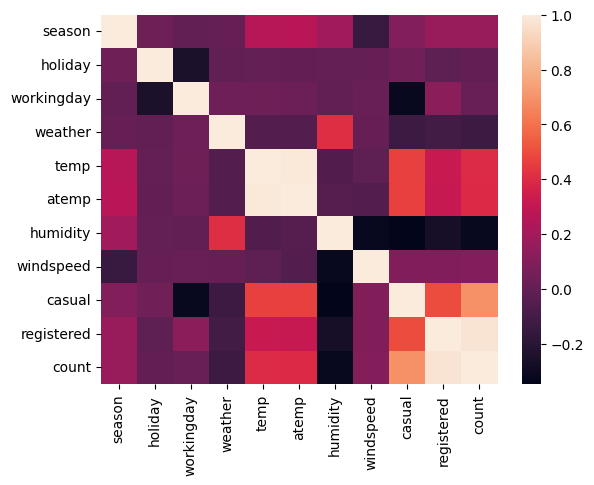

In [ ]:
sns.heatmap(df.corr())

Attributes with correlation coefficient 1 has strong positive correlation and as the coefficient moves towards zero, it becomes weak. Likewise, correlation coefficient -1 has strong negative correlation and as the coefficient moves towards zero, it becomes weak.
Here we can observe that working day and holiday has strong negative correlation. casual users and counts are moderately correlated. Humidity and temperature has moderately negative correlation.

In [ ]:
#Change datetime datatype and extract values
df['datetime']=pd.to_datetime(df['datetime'])
df['hour']=df['datetime'].dt.hour
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year

<Axes: >

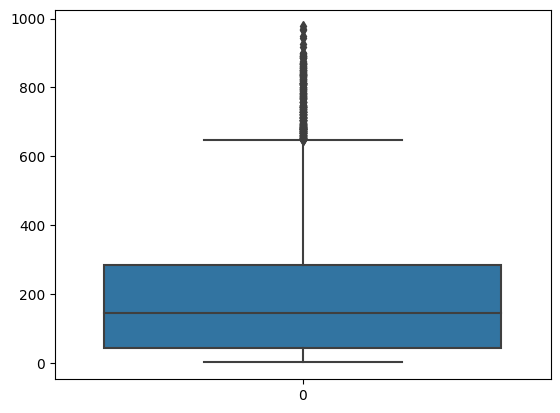

In [ ]:
#Identify outliers
sns.boxplot(df["count"])

In [ ]:
# Outlier treatment: Since the number of outliers are more, we need to find the upper and lower band to eliminate the outliers
'''
In the above box plot we can see alot of outliers. It will be appropriate to remove these outliers by calculating upper and lower band with interquartile range
'''
q1=np.quantile(df['count'],0.25)
q3=np.quantile(df['count'],0.75)
IQR=q3-q1
lower_band=q1-(1.5*IQR)
upper_band=q3+(1.5*IQR)
print('Lower band=',lower_band,'Upper band=',upper_band)

Lower band= -321.0 Upper band= 647.0


In [ ]:
df=df[(df['count']>=lower_band) & (df['count']<=upper_band)]

<Axes: >

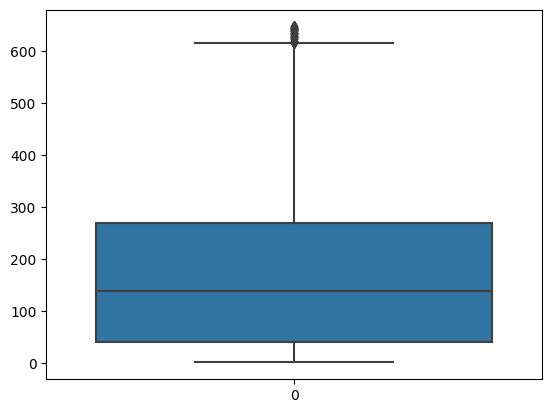

In [ ]:
sns.boxplot(df["count"])

In [ ]:
df.shape

(10586, 15)

<Axes: xlabel='weather', ylabel='count'>

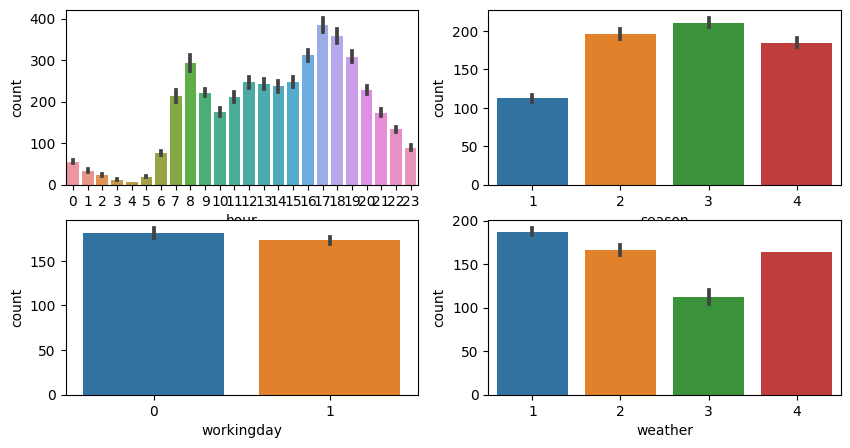

In [ ]:
#Count of rental bike according to hours,season,working day and weather
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.barplot(x=df['hour'],y=df['count'])

plt.subplot(2,2,2)
sns.barplot(x=df['season'],y=df['count'])

plt.subplot(2,2,3)
sns.barplot(x=df['workingday'],y=df['count'])

plt.subplot(2,2,4)
sns.barplot(x=df['weather'],y=df['count'])

<Axes: xlabel='windspeed', ylabel='Count'>

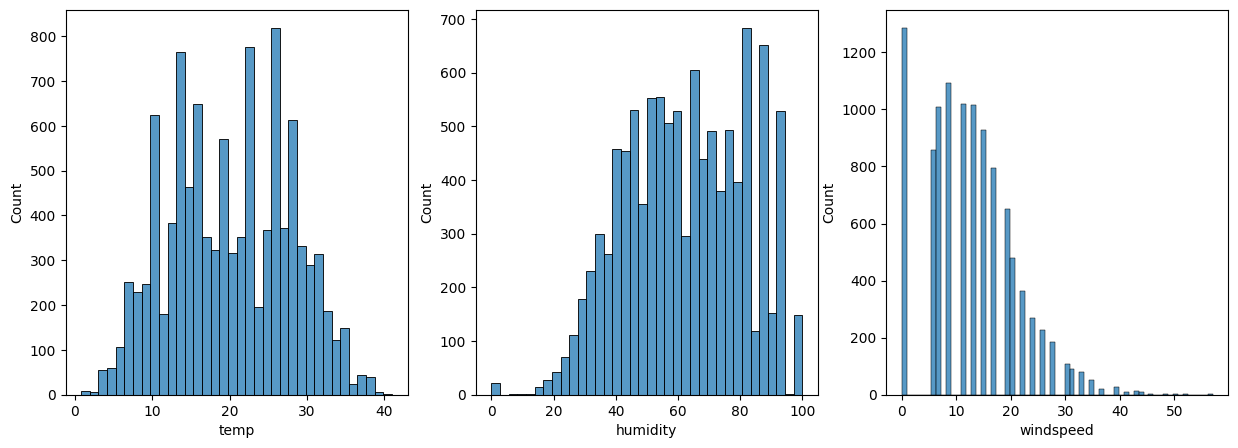

In [ ]:
#Histplot for continous attributes
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(x=df['temp'])

plt.subplot(1,3,2)
sns.histplot(x=df['humidity'])

plt.subplot(1,3,3)
sns.histplot(x=df['windspeed'])

From the above graphs, we can conclude that bike renting is at peak in the evening around 5 to 6 pm. People rent more bikes in fall and then summerand winter. Thereis slight difference in the bike renting on working and non-working days. Lastly, people prefer to rent bike more on clear days or when its cloudy or partly cloudy.

As per the histplot, people tend to rent bikes when wind speed is low, and humidity is moderate.

### Hypothesis Testing

1. Working day effect on number of electric cycle rented



*Here we set the null and alternate hypothesis as below:*

*H0 = Working day has no effect on electric bike rentals*

*H1 = Working day has effect on electric bike rentals*

*Let us assume the standard significance level for the hypothesis i.e., 5%*

In [ ]:
# Check if the data is Gaussian Distribution or not
'''
Here we will use Shapiro test to check the gaussian distribution assuming that the data is independent and identically distributed

H0 = Data has Gaussian Distribution
H1 = Data does not have Gaussian Distribution
alpha = 0.05
'''
working_day= df[df['workingday']==1]
alpha=0.05

statistics_1,p_value_1= shapiro(working_day['count'])

print('statistics=',statistics_1)
print('p_value=',p_value_1)

if p_value_1>alpha:
  print('Working Day Data has Gaussian Distribution')
else:
  print('Working Day Data does not have Gaussian Distribution')

statistics= 0.9066900610923767
p_value= 0.0
Working Day Data does not have Gaussian Distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
non_working_day= df[df['workingday']==0]
alpha=0.05

statistic_2,p_value_2= shapiro(non_working_day['count'])

print('statistics=',statistics_1)
print('p_value=',p_value_2)


if p_value_2>alpha:
  print('Non-Working Day Data has Gaussian Distribution')
else:
  print('Non-Working Day Data does not have Gaussian Distribution')

statistics= 0.9066900610923767
p_value= 2.382207389352189e-44
Non-Working Day Data does not have Gaussian Distribution


Working day and non-working day data are not a Gaussian distribution as the p_values is greater than alpha value

<Axes: xlabel='count', ylabel='Count'>

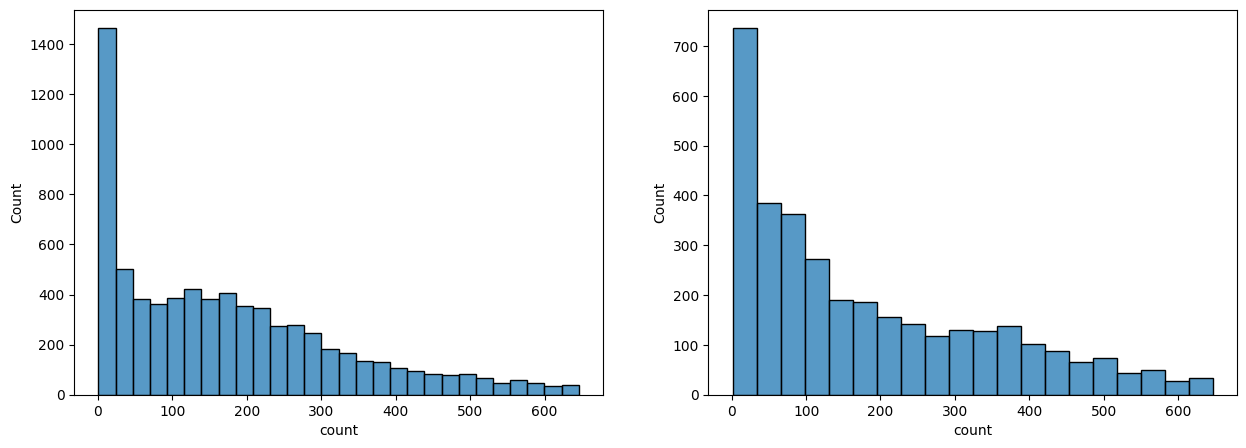

In [ ]:
# Visual distribution of data
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(working_day,x='count')

plt.subplot(1,2,2)
sns.histplot(non_working_day,x='count')

In [ ]:
# Check variance of the data
'''
We will use Levene Test to check the variance of the two dataset

H0 = Variances are equal
H1 = Variances are not equal
'''
alpha=0.05

statistics_var,p_value_var= levene(working_day['count'],non_working_day['count'])

print('statistics=',statistics_var)
print('p_value=',p_value_var)

if p_value_var>alpha:
  print('We fail to reject the null hypothesis. Hence, variances are equal')
else:
  print('Reject null hypothesis. Variances are not equal')

statistics= 26.147070184499576
p_value= 3.219098783658039e-07
Reject null hypothesis. Variances are not equal


Although the working day and non-working day data are not normally distributed and the variances are not same, still we will do the 2 sample ttest as the casestudy wants us to do that. However, we will also perform the other test and see if it gives the same result

In [ ]:
'''
As the case study requiresus to do 2 sample ttest to see if 'Working day effect on number of electric cycle rented', below are the null and alternate hypothesis.

H0 = Working day has no effect on electric bike rentals
H1 = Working day has effect on electric bike rentals
alpha = 0.05
'''
alpha=0.05

t_stat,p_value_ofttest= ttest_ind(working_day['count'],non_working_day['count'])

print('statistics=',t_stat)
print('p_value=',p_value_ofttest)

if p_value_ofttest>alpha:
  print('We fail to reject the null hypothesis. Hence, Working day has no effect on electric bike rentals')
else:
  print('We reject the null hypothesis. Working day has effect on electric bike rentals')

statistics= -2.5748856400481515
p_value= 0.010040780184497066
We reject the null hypothesis. Working day has effect on electric bike rentals


In [ ]:
'''
We know that if the requirements of 2 sample ttest fails, we can do Mann Whitney U Test to check the hypothesis.

H0 = Working day has no effect on electric bike rentals
H1 = Working day has effect on electric bike rentals
alpha = 0.05

'''
from scipy.stats import mannwhitneyu

alpha=0.05

u_stat,p_value_mann= mannwhitneyu(working_day['count'],non_working_day['count'])

print('statistics=',u_stat)
print('p_value=',p_value_mann)

if p_value_mann>alpha:
  print('We fail to reject the null hypothesis. Hence, Working day has no effect on electric bike rentals')
else:
  print('We reject the null hypothesis. Working day has effect on electric bike rentals')

statistics= 11998982.0
p_value= 0.07244967583756133
We fail to reject the null hypothesis. Hence, Working day has no effect on electric bike rentals


In the Mann Whitney U Test, the p_value is greater than the alpha value 0.05. Hence, we can conclude that the working days and non-working days have no impact on the electric bike rental.

2. No. of cycles rented in different seasons are same or different



*Here we set the null and alternate hypothesis as below:*

*H0 = Number of cycles rented in different seasons are same*

*H1 = Number of cycles rented in different seasons are different*

*Let us assume the standard significance level for the hypothesis i.e., 5%*

In [ ]:
# Check if the data is Gaussian Distribution or not
'''
Here we will use Shapiro test to check the gaussian distribution assuming that the data is independent and identically distributed

H0 = Data has Gaussian Distribution
H1 = Data does not have Gaussian Distribution
alpha = 0.05
'''
season_1= df[df['season']==1]
season_2= df[df['season']==2]
season_3= df[df['season']==3]
season_4= df[df['season']==4]

alpha=0.05

statistics_s1,p_value_season_1= shapiro(season_1['count'])

print('statistics=',statistics_s1)
print('p_value=',p_value_season_1)

if p_value_season_1>alpha:
  print('Season 1 Data has Gaussian Distribution')
else:
  print('Season 1 Data does not have Gaussian Distribution')


statistics_s2,p_value_season_2= shapiro(season_2['count'])

print('statistics=',statistics_s2)
print('p_value=',p_value_season_2)

if p_value_season_2>alpha:
  print('Season 2 Data has Gaussian Distribution')
else:
  print('Season 2 Data does not have Gaussian Distribution')


statistics_s3,p_value_season_3= shapiro(season_3['count'])

print('statistics=',statistics_s3)
print('p_value=',p_value_season_3)

if p_value_season_3>alpha:
  print('Season 3 Data has Gaussian Distribution')
else:
  print('Season 3 Data does not have Gaussian Distribution')


statistics_s4,p_value_season_4= shapiro(season_4['count'])

print('statistics=',statistics_s4)
print('p_value=',p_value_season_4)

if p_value_season_4>alpha:
  print('Season 4 Data has Gaussian Distribution')
else:
  print('Season 4 Data does not have Gaussian Distribution')

statistics= 0.8313114047050476
p_value= 0.0
Season 1 Data does not have Gaussian Distribution
statistics= 0.9152905941009521
p_value= 4.532368362589953e-36
Season 2 Data does not have Gaussian Distribution
statistics= 0.9371488690376282
p_value= 6.364172259631547e-32
Season 3 Data does not have Gaussian Distribution
statistics= 0.9188982844352722
p_value= 1.2269542276014551e-35
Season 4 Data does not have Gaussian Distribution


<Axes: xlabel='count', ylabel='Count'>

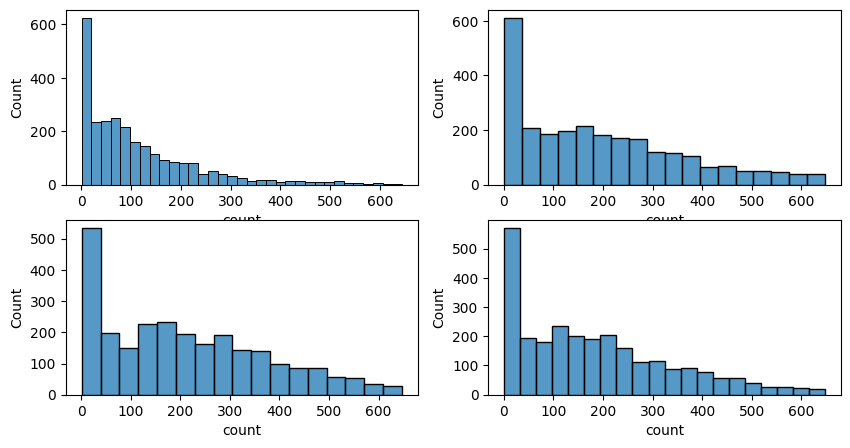

In [ ]:
# Visual distribution of data
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(season_1,x='count')

plt.subplot(2,2,2)
sns.histplot(season_2,x='count')

plt.subplot(2,2,3)
sns.histplot(season_3,x='count')

plt.subplot(2,2,4)
sns.histplot(season_4,x='count')

In [ ]:
# Check variance of the data
'''
Since the data is normally distributed, we will use Levene Test to check the variance.

H0 = Variances are equal
H1 = Variances are not equal
'''
alpha=0.05

statistics_var2,p_value_var2= levene(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

print('statistics=',statistics_var2)
print('p_value=',p_value_var2)

if p_value_var2>alpha:
  print('We fail to reject the null hypothesis. Hence, variances are equal')
else:
  print('Reject null hypothesis. Variances are not equal')

statistics= 177.84047176737855
p_value= 1.6939424019616345e-112
Reject null hypothesis. Variances are not equal


According to the tests, the data is not a Gaussian distribution and variances are also not equal. It is right skewed.
Since the casestudy wants us to keep doing the test, we will perform ANOVA test to check the hypothesis. However, we will also perform the Krushkal-Wallis test and see if it gives the same result

In [ ]:
'''
We will use ANOVA test to see if 'Number of cycles rented in different seasons are same or different'. Below are the null and alternate hypothesis for the test

H0 = Number of cycles rented in different seasons are same
H1 = Number of cycles rented in different seasons are different
alpha = 0.05
'''
alpha=0.05

f_stat,p_value_f= f_oneway(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

print('statistics=',f_stat)
print('p_value=',p_value_f)

if p_value_f>alpha:
  print('We fail to reject the null hypothesis. Hence, Number of cycles rented in different seasons are same')
else:
  print('We reject the null hypothesis. Number of cycles rented in different seasons are different')

statistics= 217.63287180093394
p_value= 5.292326890121564e-137
We reject the null hypothesis. Number of cycles rented in different seasons are different


In [ ]:
'''
As we know that if the requirements of ANOVA test fails, we can do Krushkal Wallis Test to check the hypothesis.

H0 = Working day has no effect on electric bike rentals
H1 = Working day has effect on electric bike rentals
alpha = 0.05

'''
from scipy.stats import kruskal

alpha=0.05

h_stat,p_value_kru= kruskal(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

print('statistics=',h_stat)
print('p_value=',p_value_kru)

if p_value_kru>alpha:
  print('We fail to reject the null hypothesis. Hence, Number of cycles rented in different seasons are same')
else:
  print('We reject the null hypothesis. Number of cycles rented in different seasons are different')

statistics= 620.3738431848594
p_value= 3.8591953474560567e-134
We reject the null hypothesis. Number of cycles rented in different seasons are different


In both the tests (ANOVA and Kruskal test), we can see that the number of cycles rented in different seasons are different as the p_values is less than the aplha value (0.05)

3. No. of cycles rented in different weather are same or different



*Here we set the null and alternate hypothesis as below:*

*H0 = Number of cycles rented in different weather are same*

*H1 = Number of cycles rented in different weather are different*

*Let us assume the standard significance level for the hypothesis i.e., 5%*

In [ ]:
# Check if the data is Gaussian Distribution or not
'''
Here we will use Shapiro test to check the gaussian distribution assuming that the data is independent and identically distributed.
We have also observed that weather 4 have less than 3 entries, hence it may not give appropriate results.

H0 = Data has Gaussian Distribution
H1 = Data does not have Gaussian Distribution
alpha = 0.05
'''
weather_1= df[df['weather']==1]
weather_2= df[df['weather']==2]
weather_3= df[df['weather']==3]
weather_4= df[df['weather']==4]

alpha=0.05

statistics_w1,p_value_w1= shapiro(weather_1['count'])

print('statistics=',statistics_w1)
print('p_value=',p_value_w1)

if p_value_w1>alpha:
  print('weather 1 Data has Gaussian Distribution')
else:
  print('weather 1 Data does not have Gaussian Distribution')


statistics_w2,p_value_w2= shapiro(weather_2['count'])

print('statistics=',statistics_w2)
print('p_value=',p_value_w2)

if p_value_w2>alpha:
  print('weather 2 Data has Gaussian Distribution')
else:
  print('weather 2 Data does not have Gaussian Distribution')


statistics_w3,p_value_w3= shapiro(weather_3['count'])

print('statistics=',statistics_w3)
print('p_value=',p_value_w3)

if p_value_w3>alpha:
  print('weather 3 Data has Gaussian Distribution')
else:
  print('weather 3 Data does not have Gaussian Distribution')

try:
  statistics_w4,p_value_w4= shapiro(weather_4['count'])

  print('statistics=',statistics_w4)
  print('p_value=',p_value_w4)


  if p_value_w4>alpha:
    print('weather 4 Data has Gaussian Distribution')
  else:
    print('weather 4 Data does not have Gaussian Distribution')
except:
  print('Weather 4 has less than 3 entries, It may not give appropriate result')

statistics= 0.9115554690361023
p_value= 0.0
weather 1 Data does not have Gaussian Distribution
statistics= 0.9032399654388428
p_value= 9.532115602307598e-39
weather 2 Data does not have Gaussian Distribution
statistics= 0.8118053674697876
p_value= 2.4638935234478347e-30
weather 3 Data does not have Gaussian Distribution
Weather 4 has less than 3 entries, It may not give appropriate result


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Axes: xlabel='count', ylabel='Count'>

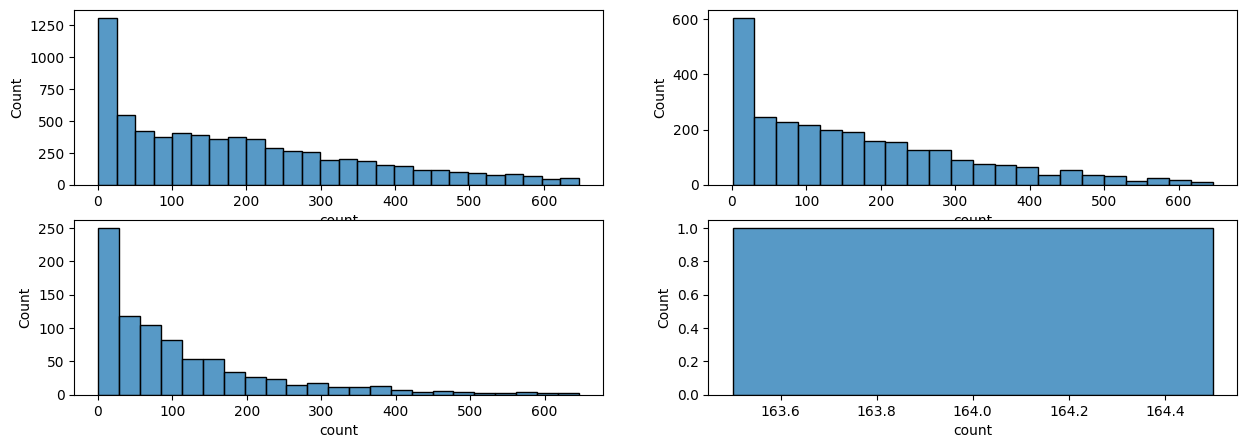

In [ ]:
# Visual distribution of data
'''
Weather 4 has only 2 entries. Hence, the graph is in approriate
'''

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.histplot(weather_1,x='count')

plt.subplot(2,2,2)
sns.histplot(weather_2,x='count')

plt.subplot(2,2,3)
sns.histplot(weather_3,x='count')

plt.subplot(2,2,4)
sns.histplot(weather_4,x='count')

In [ ]:
# Check variance of the data
'''
Since the data is normally distributed, we will use Levene Test to check the variance.

H0 = Variances are equal
H1 = Variances are not equal
'''
alpha=0.05

statistics_var3,p_value_var3= levene(weather_1['count'],weather_2['count'],weather_3['count'],weather_4['count'])

print('statistics=',statistics_var3)
print('p_value=',p_value_var3)

if p_value_var3>alpha:
  print('We fail to reject the null hypothesis. Hence, variances are equal')
else:
  print('Reject null hypothesis. Variances are not equal')

statistics= 58.699303151914386
p_value= 1.2566715363063703e-37
Reject null hypothesis. Variances are not equal


According to the tests, the data is not a Gaussian distribution and variances are also not equal. Since the casestudy wants us to keep doing the test, we will perfor ANOVA test to check the hypothesis. However, we will also perform the Krushkal-Wallis test and see if it gives the same result

In [ ]:
'''
We should use ANOVA test to see if 'Number of cycles rented in different seasons are same or different'. Below are the null and alternate hypothesis:

H0 = Number of cycles rented in different Weathers are same
H1 = Number of cycles rented in different Weathers are different
alpha = 0.05
'''
alpha=0.05

f_stat_w,p_value_w= f_oneway(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

print('statistics=',f_stat_w)
print('p_value=',p_value_w)

if p_value_w>alpha:
  print('We fail to reject the null hypothesis. Hence, Number of cycles rented in different weathers are same')
else:
  print('We reject the null hypothesis. Number of cycles rented in different weathers are different')

statistics= 217.63287180093394
p_value= 5.292326890121564e-137
We reject the null hypothesis. Number of cycles rented in different weathers are different


In [ ]:
'''
As we know that if the requirements of ANOVA test fails, we can do Kruskal Wallis Test to check the hypothesis.

H0 = Number of cycles rented in different Weathers are same
H1 = Number of cycles rented in different Weathers are different
alpha = 0.05

'''
from scipy.stats import kruskal

alpha=0.05

h_stat_w,p_value_kru_w= kruskal(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

print('statistics=',h_stat_w)
print('p_value=',p_value_kru_w)

if p_value_kru_w>alpha:
  print('We fail to reject the null hypothesis. Hence, Number of cycles rented in different weathers are same')
else:
  print('We reject the null hypothesis. Number of cycles rented in different weathers are different')

statistics= 620.3738431848594
p_value= 3.8591953474560567e-134
We reject the null hypothesis. Number of cycles rented in different weathers are different


In both the tests (ANOVA and Kruskal test), we can see that the number of cycles rented in different weathers are different as the p_values is less than the aplha value (0.05)

3. Weathers are dependent on seasons or not



*Here we set the null and alternate hypothesis as below:*

*H0 = Weathers and seasons are independent*

*H1 = Weathers and seasons are dependent*

*Let us assume the standard significance level for the hypothesis i.e., 5%*

In [ ]:
'''
Since weather and season are two categorical variables, we will check the dependency of these two using Chi-squared test.
For Chi-squaredtest we take following assumptions:

1. All observations are independent
2. Cells in the contingencytables are mutually exclusive

Below are the null and alternate hypothesisfor the test:
H0 = Weather and seasons are independent of each other
H1 = Weather and season are dependent on each other
'''
contingency= pd.crosstab(df['weather'],df['season'])

print(contingency)
chi_test=chi2_contingency(contingency)

p_value_chi= chi_test[1]
print('p_value is ',p_value_chi)

alpha=0.05

if p_value_chi>alpha:
  print('We fail to reject the null hypothesis. Hence, weather and seasons are independent of each other')
else:
  print(' We reject the null hypothesis. Weather and season are dependent on each other.')


season      1     2     3     4
weather                        
1        1744  1721  1843  1657
2         714   690   579   787
3         211   223   195   221
4           1     0     0     0
p_value is  3.643774770920206e-07
 We reject the null hypothesis. Weather and season are dependent on each other.


Since p_value of the chi2_contingency test is lesst than the alpha value (0.05), we reject the null hypothesis and conclude that  weather and seasons are depenton each other.

## **Insights & Recomendations:**


*   There are total 10886 rows and 12 columns in the dataset. After removing the outliers, we are left with 10583 rows.

*   There are no null values or duplicate valuesin the dataset.

*   We can observe that working day and holiday has strong negative correlation. casual users and counts are moderately correlated. Humidity and temperature has moderately negative correlation.

*   From the graphical representation ofunivariate and bivariate variables, we can conclude that bike renting is at peak in the evening around 5 to 6 pm. People rent more bikes in fall and then summer and winter. There is slight difference in the bike renting on working and non-working days. Lastly, people prefer to rent bike more on clear days or when its cloudy or partly cloudy. As per the histplot, people tend to rent bikes when wind speed is low, and humidity is moderate.

1.   Company should get more bikes in stock during 5 to 6 pm asthe demand tend to be high at tha time.
2.   Fall season has the high demand for rentals bike than any other seasions. Comapny should focus  on that

3.   Stock of bike should be more on clear and semi cloudy days, when its moderate humidity and when the wind speed is low.

*   In the hypothesis testing for 'Working day effect on number of electric cycle rented', we can see that the working day and non-working day data are not normally distributed and the variances are not same. We have performed both 2sample ttest and Mann Whitney U Test.

As per Mann Whitney U Test, we could conclude that the working days and non-working days have no impact on the electric bike rental. However, 2 sample ttest shows that Working day has effect on electric bike rentals.

*   In the hypothesis testing for 'No. of cycles rented in different seasons are same or different', the data is not a Gaussian distribution and variances are also not equal. It is right skewed. After performing both the tests i.e., ANOVA test and Krushkal-Wallis test, we could conclude that Number of cycles rented in different seasons are different


*   In the hypothesis testing for 'No. of cycles rented in different weather are same or different', the data is not a Gaussian distribution and variances are also not equal. It is right skewed. After performing both the tests i.e., ANOVA test and Krushkal-Wallis test, we could conclude that Number of cycles rented in different seasons are different

*   In the last hypothesis testing for weather and season dependency, after doing the chi2_contingency test, we conclude that Weather and season are dependent on each other.











